# Test de YOLO sur raspberry pi


## Installation des dépendances


In [1]:
%pip install matplotlib
%pip install ultralytics[export]

Note: you may need to restart the kernel to use updated packages.


## Importation des dépendances


In [1]:
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

## Code principal


### Environnement


In [2]:
# formats = ["torchscript", "onnx", "openvino", "saved_model", "pb", "tflite", "paddle", "mnn", "ncnn"]
formats = ["onnx"]
models = ["yolo11n", "yolo11l"]

BASE_PATH = os.path.dirname(os.getcwd())

### Export des modèles sous différents formats


In [4]:
def export_model(model_name: str = "yolo11n", format: str = "OpenVINO", device : str = "cpu", image_size : int = 640) -> str:
    """
    Exportation du modèle YOLO dans un certain format.

    :param model_name : Nom du modèle à exporter.
    :param format : Format d'exportation du modèle.
    :param device : Périphérique sur lequel le modèle doit être exporté (GPU -> 0, CPU -> cpu, NVDIA Jetson -> dla:0 / dla:1).
    :param image_size : Taille de l'image d'entrée du modèle.
    """

    model = YOLO(f"./saved/{model_name}.pt")

    return model.export(format=format, device=device, imgsz=image_size)

In [5]:
models_path = []

for model in models:
    for format in formats:
        models_path.append(export_model(model_name=model, format=format))

print("Exportation terminée.")

Ultralytics 8.3.50  Python-3.9.20 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'saved\yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success  1.2s, saved as 'saved\yolo11n.onnx' (10.1 MB)

Export complete (1.6s)
Results saved to C:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\yolo\saved
Predict:         yolo predict task=detect model=saved\yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=saved\yolo11n.onnx imgsz=640 data=/content/drive/MyDrive/projet-ia-embarquee/data/dataset1/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.50  Python-3.9.20 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLO11l summary (fused): 464 layers, 25,

In [6]:
models_path

['saved\\yolo11n.onnx', 'saved\\yolo11l.onnx']


Modèle : saved\yolo11n.onnx
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading saved\yolo11n.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\30_001.png: 640x640 1 SpeedLimit30, 35.0ms
Speed: 4.0ms preprocess, 35.0ms inference, 29.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.9952])


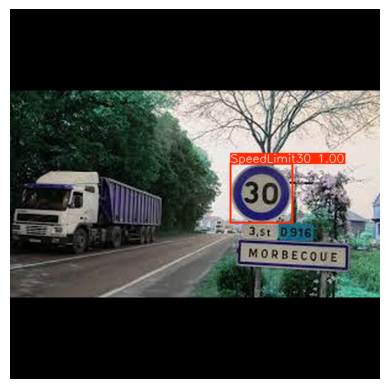


image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\50_001.png: 640x640 2 SpeedLimit30s, 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.8413, 0.2946])


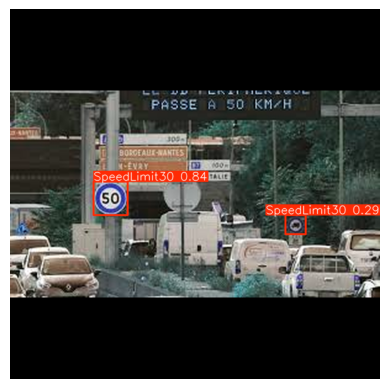


Modèle : saved\yolo11l.onnx
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading saved\yolo11l.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\30_001.png: 640x640 1 SpeedLimit30, 260.7ms
Speed: 2.1ms preprocess, 260.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.9537])


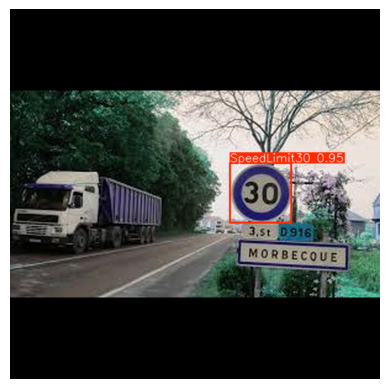


image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\50_001.png: 640x640 1 SpeedLimit30, 1 SpeedLimit50, 270.0ms
Speed: 2.0ms preprocess, 270.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.8591, 0.3239])


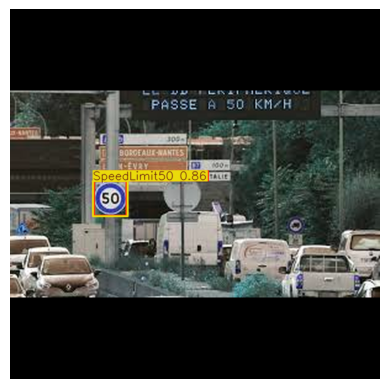

In [8]:
test_images_path = f"{BASE_PATH}/data/dataset1/images_converted/test/"

for model in models_path:
    print(f"\nModèle : {model}")
    
    model = YOLO(model)
    
    for image_name in os.listdir(test_images_path):
        image_path = os.path.join(test_images_path, image_name)

        results = model(image_path)
        results_image = results[0].plot()

        print(f"Confidence: {results[0].boxes.conf}")

        plt.imshow(results_image)
        plt.axis("off")
        plt.show()